# 0. Pandas 

Pandas library: 데이터를 수집하고 정리하는 데 최적화된 도구들을 모아놓음
<br>
<br>
분석을 위해 다양한 소스(source)로부터 수집하는 데이터는 형태나 속성이 매우 다양하다. 특히 서로 다른 형식을 갖는 여러 종류의 데이터를 컴퓨터가 이해할 수 있도록 동일한 형식을 갖는 구조로 통합할 필요가 있다.
<br>
이를 위해 판다스는 시리즈(Series)와 데이터프레임(DataFrame)이라는 구조화된 데이터 형식을 제공한다.

# 1. Series 
- index label, value, column name으로 구성
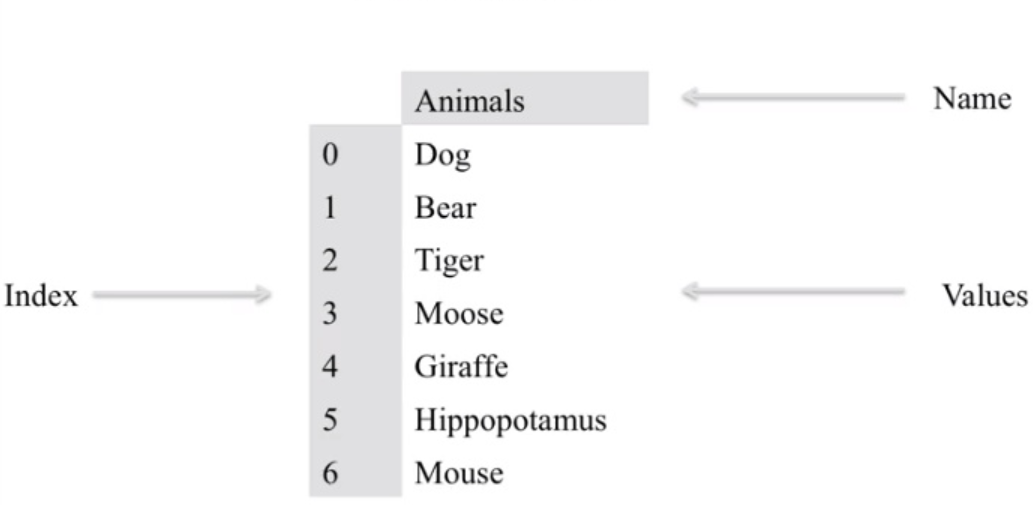
<br>
(출처:https://engkimbs.tistory.com/672)

#### 1. 리스트로 시리즈 만들기

In [19]:
import pandas as pd

In [11]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [12]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

#### 2. missing data 다루는 방법
- 문자열 리스트에 None이 포함 → None
- 숫자 리스트에 None이 포함 → NaN (not a number)

In [13]:
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [14]:
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

- NaN은 None과 비슷한 의미를 가지고 있지만 숫자가 아니다

In [15]:
import numpy as np
np.nan == None #np.nan = NaN

False

In [16]:
np.nan == np.nan

False

In [17]:
np.isnan(np.nan) #the Numpy library is NaN.

True

#### 3. 사전으로 시리즈 만들기
- index label: 사전의 key
- value: 사전의 value

In [18]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

- 사전의 key가 아닌 다른 값을 index label로 설정하기: index=[  ]

In [11]:
s = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])
s

India      Tiger
America     Bear
Canada     Moose
dtype: object

- 사전의 key의 개수 ≠ index list의 데이터수 dictionary keys의 수
<br>
   1. index list에만 있는 값: 그 index에 대한 값이 None or NaN
<br>
   2. 사전에만 있는 값: 무시 

In [6]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
s

Golf      Scotland
Sumo         Japan
Hockey         NaN
dtype: object

# 2. Querying a Series

### 1. 시리즈의 value 찾아내는 방법
- iloc : index로 찾기
- loc : index label으로 찾기 

In [20]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [5]:
s.iloc[3]

'South Korea'

In [14]:
s.loc['Golf']

'Scotland'

- [integer]은 iloc , [object]은 loc을 사용한 것처럼 결과값을 도출함
- 그러나 index label 자체가 정수일 경우 loc와 iloc 중 무엇을 사용해야할 지 판단하지 못함 → iloc/loc을 사용해야함.

In [15]:
s[3]

'South Korea'

In [16]:
s['Golf']

'Scotland'

In [17]:
sports = {99: 'Bhutan',
          100: 'Scotland',
          101: 'Japan',
          102: 'South Korea'}
s = pd.Series(sports)

In [13]:
s[0] 

KeyError: 0

### 2. 시리즈의 value 다루기
#### (1)  vectorization 
- 예시: np.sum... 
- 처리 속도가 빠름

In [6]:
import numpy as np
import pandas as pd

s = pd.Series([100.00, 120.00, 101.00, 3.00])
s

0    100.0
1    120.0
2    101.0
3      3.0
dtype: float64

In [9]:
total = 0
for item in s:
    total+=item
print(total)

324.0


In [7]:
total = np.sum(s)
print(total)

324.0


#### (2) broadcasting
- apply an operation to every value in series
- 처리 속도가 빠르고 코드를 읽기 쉬움

In [17]:
for label, value in s.iteritems():
    s.set_value(label, value+2)
s.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0    104.0
1    124.0
2    105.0
3      7.0
dtype: float64

In [16]:
#adds two to each item in s using broadcasting

s+=2 
s.head()

0    102.0
1    122.0
2    103.0
3      5.0
dtype: float64

#### (3) loc 
- modify data in place 
- add new data 

In [11]:
s = pd.Series([1, 2, 3])
print(s)

#modify data
s.loc[2] = 5 

#add new data
s.loc['Animal'] = 'Bears'
s

0    1
1    2
2    3
dtype: int64


0             1
1             2
2             5
Animal    Bears
dtype: object

#### (4) append: 시리즈 합치기 

In [8]:
original_sports = pd.Series({'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Taekwondo': 'South Korea'})
cricket_loving_countries = pd.Series(['Australia',
                                      'Barbados',
                                      'Pakistan',
                                      'England'], 
                                   index=['Cricket',
                                          'Cricket',
                                          'Cricket',
                                          'Cricket'])
all_countries = original_sports.append(cricket_loving_countries)

In [14]:
all_countries

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
Cricket        Australia
Cricket         Barbados
Cricket         Pakistan
Cricket          England
dtype: object

In [9]:
#합치기전의 series는 변하지 않는다

original_sports 

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [16]:
# index label이 유일하지 않을때 loc의 결과값으로 시리즈를 반환

all_countries.loc['Cricket']

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

# 3. DataFrame 
- 이차원의 시리즈
- distinction between column and row is conceptual 

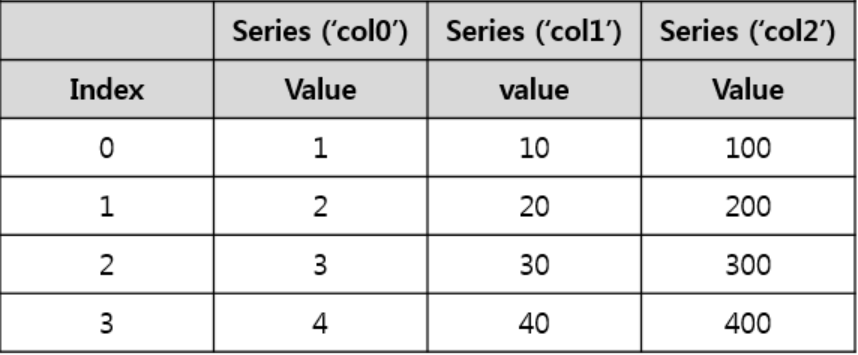

(출처: https://wikidocs.net/4367)

In [2]:
import pandas as pd
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


### 1. iloc/loc[행의 인덱스/인덱스 라벨]을 통해 데이터프레임의 값 찾기

#### (1) iloc/loc[single value]
- index label이 유일할때: 시리즈를 반환
- index label이 유일하지 않을때: 데이터프레임을 반환

In [18]:
df.loc['Store 2']

Name                  Vinod
Item Purchased    Bird Seed
Cost                      5
Name: Store 2, dtype: object

In [34]:
df.loc['Store 1']

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5


#### (2) loc[index label, column name]: 행과 열을 모두 이용해서 데이터 찾기

In [35]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

### 2. Column name을 이용해서 데이터 찾기

#### (1) Transpose → loc 사용

In [37]:
df.T
df.T.loc['Cost']

Store 1    22.5
Store 1     2.5
Store 2       5
Name: Cost, dtype: object

#### (2) df.[column name]

In [11]:
df['Cost']

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

### 3. Chaning
- chaining operations together
- return copy of dataframe instead of view → 처리 속도가 느려짐

In [40]:
df.loc['Store 1']['Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

### 4. Slicing 

In [41]:
df.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


### 5. 데이터 지우기

#### (1) drop function 이용
- 기존 데이터프레임을 바꾸지 않고, 지정한 행을 없앤 복사본을 반환
- two optional parameters가 존재함
 1. in place: true → 복사본을 출력하지 않고 원본을 변경
 2. axis: 0으로 설정되어있을 경우 행을 없앰, 1으로 설정되어있을 경우 열을 없앰

In [8]:
df.drop('Store 1')

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [4]:
df #기존 데이터프레임은 바뀌지 않음 

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


#### (2) del 이용: 기존 데이터프레임에서 데이터를 삭제함

In [9]:
copy_df = df.drop('Store 1')

del copy_df['Name']
copy_df

,Item Purchased,Cost
Store 2,Bird Seed,5.0


### 6. 새로운 열 추가하기
- 데이터프레임이름[column name] : value 의 형태

In [29]:
df['Location'] = None
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


# 4. Dataframe Loading

#### 1. 데이터를 조작하면, 기존 데이터프레임에 변화를 주게 된다. (이를 피하려면 copy를 만들어 사용)

In [36]:
costs = df['Cost']
costs

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [37]:
costs+=2
costs

Store 1    24.5
Store 1     4.5
Store 2     7.0
Name: Cost, dtype: float64

In [39]:
#원래 dataframe이 변화

df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,24.5,None
Store 1,Kevyn,Kitty Litter,4.5,None
Store 2,Vinod,Bird Seed,7.0,None


#### 2. CSV file을 읽은 후, index와 header 새로 설정하기

In [10]:
%cat olympics.csv

UsageError: Line magic function `%cat` not found.


In [11]:
df = pd.read_csv('olympics.csv')
df.head()

FileNotFoundError: [Errno 2] File b'olympics.csv' does not exist: b'olympics.csv'

- index_col: 특정 열을 index label로 설정
- skiprows = a : a개의 행을 무시하고 그 다음 행을 header로 설정

In [4]:
df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1)
df.head()

NameError: name 'pd' is not defined

#### 3. 열 이름 바꾸기: 모든 열을 차례대로 가져와서 rename( )을 적용

In [5]:
# .columns → 모든 column name을 저장 

df.columns 

NameError: name 'df' is not defined

In [6]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

df.head()

NameError: name 'df' is not defined

# 5. Boolean masking
- array of one dimension / two dimensions
- True or False를 value로 가짐

#### (1) operator를 시리즈나 데이터프레임에 사용하여 생성 

In [7]:
df['Gold'] > 0

NameError: name 'df' is not defined

#### (2) where( )
- boolean mask를 데이터프레임에 덮어씌움
- 참의 값을 가지는 cell은 최종 결과에 포함되지만, 거짓의 값을 가지는 cell은 제외 (NaN이 표시됨)

In [ ]:
only_gold = df.where(df['Gold'] > 0) 
only_gold.head()

#### (3) dropna( ): 데이터가 없는 행(NaN의 값을 가지는 행)을 제거

In [ ]:
only_gold = only_gold.dropna()
only_gold.head()

#### (4) [   ]
- where() 대신 사용 가능
- 데이터가 없는 행(NaN의 값을 가지는 행)들을 자동으로 제거

In [ ]:
only_gold = df[df['Gold'] > 0]
only_gold.head()

#### (5) and와 or을 사용

In [ ]:
#하계 올림픽에서 금메달을 땄거나, 동계 올림픽에서 금메달을 딴 나라

len(df[(df['Gold'] > 0) | (df['Gold.1'] > 0)])

In [ ]:
#동계올림픽에서는 금메달을 땄지만, 하계올림픽에서는 금메달을 따지 못한 나라 

df[(df['Gold.1'] > 0) & (df['Gold'] == 0)]

# 6. Indexing Dataframes

#### 1. set_index( ): 
- 특정 열을 index로 설정함

In [2]:
# 기존 index를 새로운 열에 저장 (set_index()를 사용하면 기존 index가 사라지기 때문)

df['country'] = df.index
df

NameError: name 'df' is not defined

In [ ]:
#하계올림픽 금메달 개수를 index로 지정

df = df.set_index('Gold')
df.head()

#### 2. reset_index( )
- index를 리셋
- 0,1,2,3...의 기본 index를 생성


In [ ]:
df = df.reset_index()
df.head()

#### 3. multi-level index
- set_index([column1, column2, ...])의 형태

In [11]:
df = pd.read_csv('census.csv')
df.head()

FileNotFoundError: [Errno 2] File b'census.csv' does not exist: b'census.csv'

In [ ]:
df=df[df['SUMLEV'] == 50]
df.head()

In [ ]:
columns_to_keep = ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df = df[columns_to_keep]
df.head()

In [ ]:
df = df.set_index(['STNAME', 'CTYNAME'])
df.head()

- multi-level index를 통해 데이터 찾기
  1. loc을 사용
  2. level의 순서대로 적어야함
  3. 가작 바깥쪽 열 = level 0 

In [ ]:
#하나의 county에 대한 데이터

df.loc['Michigan', 'Washtenaw County']

In [12]:
#2개 이상의 county에 대한 데이터를 보려고 할 때 

df.loc[ [('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]

NameError: name 'df' is not defined

# 7. Missing values

- statistical function을 사용할 때 보통 결측값을 무시
- 결측값 다루기 (결측값도 정보를 가지고 있을 수 있기 때문)
  1. fillna(single value): 모든 결측값을 하나의 값(string, interger...)으로 바꾸기 
  2. fillna(method='ffill'): 결측값을 이전 행의 값으로 바꿈 
  3. fillna(method='bfill'): 결측값을 다음 행의 값으로 바꿈

In [ ]:
df = pd.read_csv('log.csv')
df

In [ ]:
df = df.set_index(['time', 'user'])
df

In [ ]:
df = df.fillna(method='ffill')
df.head()